# 실습 - 도로 표지판 인식하기


## 개요
  - 도로 표지판 이미지를 구분해내는 모델을 만들어 봅시다.

## 목표
  - validation dataset 에 대해 93% 이상의 정확도를 가지는 모델을 만들고자 합니다.


In [1]:
import urllib
import zipfile

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
def download_and_extract_data():
    url = 'https://storage.googleapis.com/download.tensorflow.org/data/certificate/germantrafficsigns.zip'
    urllib.request.urlretrieve(url, 'germantrafficsigns.zip')
    with zipfile.ZipFile('germantrafficsigns.zip', 'r') as zip_ref:
        zip_ref.extractall()

download_and_extract_data()

# 1 & 2. 데이터 준비 & 이미지 전처리

  - 다운로드 받은 데이터를 읽어서 준비합니다.
  - 전처리를 수행합니다.

In [3]:
IMG_SIZE = 30
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
      rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'train/', 
    target_size= (IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        'validation/',
    target_size= (IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
        class_mode='categorical')

Found 31367 images belonging to 43 classes.
Found 7842 images belonging to 43 classes.


# 3. 모델 정의

  - 모델 모양을 정의합니다.
  - Input, Output 모양을 유의하세요.

In [4]:
model = tf.keras.models.Sequential([
    # model을 정의하세요
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(30, 30, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(43, activation='softmax')
 
])

C:\Users\User\.conda\envs\dl_312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# 4. 모델 컴파일

  - 학습 방법을 정의하세요
  - loss, optimizer, metrics 를 올바르게 지정하면 충분합니다.

In [5]:
model.compile(
    # 함수 내용을 작성하세요.
    optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy']
)

# 5. 모델 학습

  - 학습을 위한 epoch, batch_size 등을 설정하세요.
  - 이 외에 사용하고 싶은 기법들은 자유롭게 도입하셔도 됩니다.

In [7]:
model.fit(
        train_generator,
        validation_data=validation_generator,
        epochs=10, # epoch 도 마음대로 설정하세요
        batch_size=BATCH_SIZE
)

C:\Users\User\.conda\envs\dl_312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 89s 90ms/step - accuracy: 0.5222 - loss: 1.7890 - val_accuracy: 0.9253 - val_loss: 0.2669
Epoch 2/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9423 - loss: 0.2058 - val_accuracy: 0.9561 - val_loss: 0.1635
Epoch 3/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9699 - loss: 0.1066 - val_accuracy: 0.9621 - val_loss: 0.1252
Epoch 4/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9831 - loss: 0.0588 - val_accuracy: 0.9535 - val_loss: 0.1553
Epoch 5/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9846 - loss: 0.0509 - val_accuracy: 0.9568 - val_loss: 0.1724
Epoch 6/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9884 - loss: 0.0410 - val_accuracy: 0.9697 - val_loss: 0.1477
Epoch 7/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9899 - loss: 0.0340 - val_accuracy: 0.9679 - val_loss: 0.1297
Epoch 8/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9919 - loss: 0.0268 - val_accuracy: 

# Appendix

- 이미지를 View 합니다.
- model 로 predict 를 합니다.

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Take one batch of images and labels
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory='validation/',
    image_size= (IMG_SIZE,IMG_SIZE)
    , batch_size=BATCH_SIZE)

Found 7842 files belonging to 43 classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


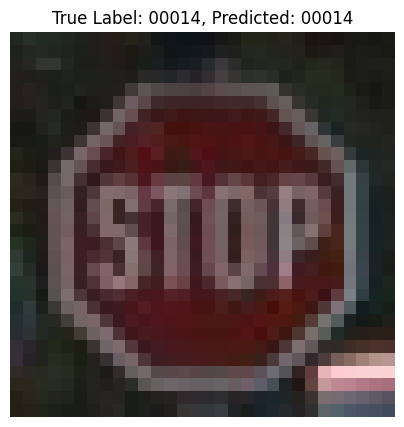

In [11]:
images, labels = next(iter(val_ds.shuffle(buffer_size=10000)))

data_index = 0

selected_image = images[data_index].numpy().astype("uint8")
selected_label = labels[data_index].numpy()

image_to_predict = np.expand_dims(selected_image/255, axis=0)

# Make a prediction
predictions = model.predict(image_to_predict)
predicted_label = np.argmax(predictions)

plt.figure(figsize=(5,5))
plt.imshow(selected_image)
class_names = val_ds.class_names
plt.title(f"True Label: {class_names[selected_label]}, Predicted: {class_names[predicted_label]}")
plt.axis("off")
plt.show()

# Transfer Learning

  - transfer learning 을 이용해서도 문제를 풀어봅니다

In [ ]:
# 모델을 정의, compile 합니다.


In [ ]:
# 학습, 검증 데이터를 준비합니다.


In [ ]:
# 모델을 학습합니다.
